# Crashes Madrid 2009

This notebook shows how to create a heatmap to summarize data related to crashed in Madrid during 2009.

Data source: [EMT OpenData](http://opendata.emtmadrid.es/)

In [1]:
#%load_ext watermark
%reload_ext watermark

%watermark -v -d -a "David Torres Pascual" -p pandas,matplotlib,seaborn

David Torres Pascual 2016-10-03 

CPython 3.5.2
IPython 4.2.0

pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.1


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('acc.xls', skiprows=7); 
df = df.dropna(how='all')
df=df.rename(columns = {'Unnamed: 11':'TOTAL'})

In [4]:
col = df.columns[1:]
col_centrales = col[1:-1]
col_total = col[-1]
df2 = (df[col].T / df[col].TOTAL).T
df2.index = df['DISTRITO_ACCIDENTE']
del df2['TOTAL']

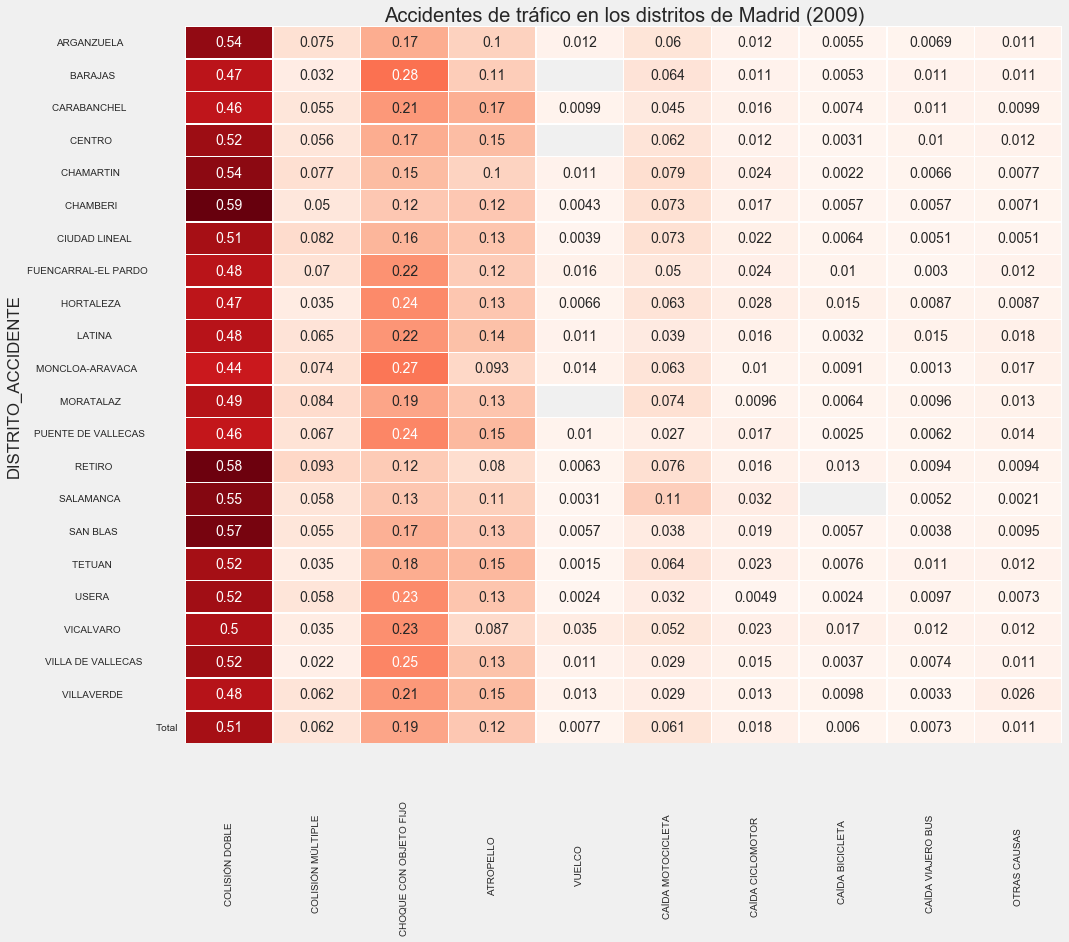

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,12))
ax = sns.heatmap(df2, annot=True, linewidths=.5, cmap='Reds', cbar=False)
plt.title('Accidentes de tráfico en los distritos de Madrid (2009)')
plt.show()
#plt.savefig('hmap.png', dpi=200, bbox_inches='tight')